(ch:oneD-data)=
# 1차원 데이터

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북을 사용하고 있다면 아래 명령어(파이썬 코드 아님)를 통해 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

**데이터 저장소 디렉토리**

앞으로 사용할 데이터셋들의 기본 저장소를 지정한다.

In [5]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 데이터셋 불러오기

50명의 영어와 수학 점수를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
이때 학생번호를 인덱스로 지정한다.

In [6]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


**`head()`/`tail()` 메서드**

`head()`/`tail()` 메서드에 정수 인자를 지정하면 지정된 개수의 샘플로 구성된 데이터프레임이 생성된다. 인자를 입력하지 않으면 기본값인 5가 실행된다. 따라서 처음 5명과 마지막 5명의 점수는 다음과 같이 확인할 수 있다.

In [7]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [8]:
df.tail()

,english,mathematics
student number,,
46,45,71
47,66,80
48,55,77
49,64,83
50,66,88


## 넘파이 어레이 활용

처음 열 명의 이름을 A, B, C, ..., J로 지정하면서 영어 점수로만 구성된 데이터프레임을 지정해 보자.

먼저 처음 10명의 영어 점수로 구성된 넘파이 어레이를 생성한다.


:::{admonition} 넘파이 어레이
:class: tip

- 넘파이 어레이: 숫자로만 구성된 리스트와 유사하며, 데이터 분석 분야에서 가장 중요한 자료형이다.
- `np.array()` 함수: 리스트, 시리즈 등의 값을 어레이 자료형으로 변환시킨다.
:::

In [9]:
first10english = df['english'].head(10)

scores = np.array(first10english)
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

그런 다음, 이 어레이를 이용해 열 명의 이름을 A, B, C, ..., J로 지정한 새로운 데이터프레임을 생성한다.

In [10]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 데이터 대표값

주어진 데이터셋을 대표하는 값으로 평균값, 중앙값, 최빈값이 가장 많이 사용된다. 각 대표값들의 의미와 파이썬을 이용해 계산하는 여러가지 방법들에 대해서 살펴보자.

**평균값**

평균값은 데이터를 모두 더한 뒤, 데이터의 개수로 나눈 값을 말한다. 데이터셋이 $n$ 개의 데이터 $x_1, x_2, \cdots, x_n$로 이루어져 있다면 이 데이터셋의 평균값 $\bar x$는 다음과 같이 구한다.

$$
\bar x = \frac 1 n \sum_{i=1}^{n} x_i = \frac 1 n (x_1 + x_2 + \cdots + x_n)
$$

예를 들어, 처음 10명 학생의 영어 점수의 평균값은 다음과 같고, 위에서 생성한 넘파이 어레이 `scores` 또는 데이터프레임 `scores_df`를 이용해 3가지 방식으로 계산할 수 있다.

$$
\frac{42 + 69 + \cdots + 58}{10} = 55
$$

- 파이썬

In [11]:
mean = sum(scores) / len(scores)
print("평균값:", mean)

평균값: 55.0


- 넘파이 어레이의 `mean()` 메서드 활용

In [12]:
np.mean(scores)

55.000000

- 데이터프레임의 `mean()` 메서드 활용

In [13]:
scores_df.mean()

score    55.0
dtype: float64

**중앙값**

중앙값은 데이터를 크기 순서대로 나열할 때 정확히 중앙에 위치한 값이다.
따라서 중앙값을 구하려면 먼저 값들을 크기순으로 정렬해야 한다. 이때 넘파이 어레이의 `sort()` 메서드를 사용하면 편리하다.

In [14]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

정렬한 후에 데이터 개수 n이 짝수인지 홀수인지에 따라 중앙값을 지정한다.

- n이 홀수일 때: (n+1)/2 번째 데이터
- n이 짝수일 때: n/2 번째 데이터와 (n/2) + 1 번째 데이터의 평균값

따라서 처음 10명의 영어 점수의 중앙값을 계산하는 방법은 다음과 같다.

- 파이썬

In [15]:
n = len(sorted_scores)

if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]

print("중앙값:", median)

중앙값: 56.5


- 넘파이 어레이의 `median()` 메서드 활용

In [16]:
np.median(scores)

56.500000

- 데이터프레임의 `median()` 메서드 활용

In [17]:
scores_df.median()

score    56.5
dtype: float64

**최빈값**

최빈값은 데이터에서 가장 많이 나타나는 값이다.
10명의 영어 점수에서 65가 두 번 나타나며 나머지 값은 한 번만 사용되었으므로, 65가 최빈값이다.
데이터프레임의 `mode()` 메서드를 이용하여 최빈값을 쉽게 확인할 수 있다.

In [18]:
scores_df.mode()

,score
0,65


## 데이터 분포

**편차**

각 데이터가 평균으로부터 떨어져 있는 정도를 **편차**<font size='2'>deviation</font>라 한다.
즉, 편차는 데이터들이 평균값으로부터 떨어져 있는 정도를 나타내는 값이다.

앞에서 10명 학생의 영어 점수의 평균값을 구했으므로, 각 학생의 성적 편차는 다음과 같이 계산된다.

In [19]:
mean = np.mean(scores)
print('scores의 평균값:', mean)

deviation = scores - mean
deviation

scores의 평균값: 55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

평균값이 같은 데이터라 하더라도 편차는 많이 다를 수 있다.
예를 들어 다음 10명의 편차는 이전 10명의 편차보다 상대적으로 많이 작다.

In [20]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]

another_mean = np.mean(another_scores)
print('another_scores의 평균값:', another_mean)

another_deviation = another_scores - another_mean
another_deviation

another_scores의 평균값: 55.0


array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

두 데이터셋의 편차를 각각 그림으로 나타내면 `another_scores`에 포함된 데이터들의 편차가 훨씬 작음을
알 수 있다.

- `scores` 데이터들의 편차

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/ch02/img-2-1.jpg" style="width:600px"></div></p>

- `another_scores` 데이터들의 편차

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/ch02/img-2-2.jpg" style="width:600px"></div></p>

데이터프레임을 이용하여 동일한 결과를 확인할 수 있다.

아래 코드는 `scores_df` 데이터프레임을 복제해서 새로
생성한 데이터프레임에 편차 데이터를 추가하는 방법을 보여준다.

In [21]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation

summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


`mean()` 메서드를 사용하면 각 열의 평균값을 출력하므로, 영어 점수의 평균값과 편차들의 평균값을 확인할 수 있다. 편차의 평균값은 항상 0 임에 주의한다.

In [22]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

**분산**

데이터들의 편차는 항상 음수와 양수가 섞여 평균값이 0이 된다. 데이터들이 평균값을 기준으로 얼마나 떨어져 있는지를 나타내는 측정값으로는 적절치 않다. 이러한 용도로 쓰이는 값이 바로 지금부터 소개할 분산<font size='2'>variance</font>과 표준편차<font size='2'>standard deviation</font>이다.

**분산**<font size='2'>variance</font>는 편차의 제곱의 평균값이며, 계산식은 다음과 같다.

$$
S^2 = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2 = \frac 1 n \left\{(x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \cdots + (x_n - \bar x)^2 \right \}
$$

예를 들어 `scores`에 포함된 학생 10명의 영어 점수의 분산은 다음과 같고, 편차의 제곱에 `mean()` 메서드를 적용해 구할 수 있다.

$$
S^2 = \frac{1}{10} \left\{ (42-55)^2 + (69-55)^2 + \cdots + (58-55)^2 \right\} = 86
$$

In [23]:
np.mean(deviation ** 2)

86.000000

넘파이의 `var()`와 데이터프레임의 `var()` 메서드를 활용해 구해도 된다. 하지만 데이터프레임을 이용할 때는 `ddof=0` 키워드 인자를 사용해 (편향된) 표본분산<font size='2'>sample variance</font>을 계산토록 해야한다.


In [24]:
np.var(scores)

86.000000

In [25]:
scores_df.var(ddof=0)

score    86.0
dtype: float64

`ddof` 키워드 인자를 생략하면 `ddof=1`로 지정된 기본 옵션이 실행되며
불편분산<font size='2'>unbiased variance</font>, 즉 편향되지 않은 표본분산을 계산한다. 편향분산<font size='2'>biased variance</font>과 불편분산의 구분은 잠시 후에 설명한다.

In [26]:
scores_df.var()

score    95.555556
dtype: float64

In [27]:
scores_df.var(ddof=0)

score    86.0
dtype: float64

한편, `np.var()` 함수 또한 `ddof` 키워드 인자를 사용할 수 있는데, 기본값은 데이터프레임의 경우와는 달리 0으로
지정되어 있어서 기본적으로 편향분산을 계산한다.

In [28]:
np.var(scores, ddof=0)

86.000000

`ddof=1`로 지정하면 불편분산을 계산한다.

In [29]:
np.var(scores, ddof=1)

95.555556

:::{admonition} 편향분산 vs. 불편분산
:class: note

불편분산을 이해하려면 먼저 모집단과 표본 개념을 이해해야 한다.

- 모집단: 분석 대상인 모든 데이터. (ex) 전 세계인들의 몸무게
- 표본: 분석 대상인 모집단으로부터 추출한 일부 데이터. (ex) 모든 국가에서 국가별 100명을 무작위로 선택해 얻은 몸무게 데이터
- 모분산: 모집단의 분산
- 표본분산: 표본의 분산

모집단 데이터는 일반적으로 구하기가 매우 어렵거나 불가능할 수 있다.
따라서 모평균과 모분산은 표본들의 평균값과 분산으로 적절한
신뢰도와 함께 추정한다.

n개 표본 샘플 편차의 제곱의 평균값을 편향분산<font size='2'>biased variance</font>이라고 하고, 이때 분모를 n이 아닌 n-1로 바꾼 값을 불편분산<font size='2'>unbiased variance</font>이라고 한다. 불편분산의 기댓값을 구하면 모분산의 추정값이 된다는 것이 수학적으로 증명되며, 자세한 설명은 [불편추정량에 대한 고백](https://recipesds.tistory.com/entry/왜-표본분산은-n-1로-나누죠-자유도-불편추정량에-대한-고백)에서 찾아볼 수 있다.
:::

아래 코드는 편차의 제곱을 새로운 변수 `summary_df`가 가리키는 데이터프레임의 새로운 특성(변인)으로 추가한다.

In [30]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


각 특성의 평균값을 계산하면 앞서 `scores`에 포함된 데이터들의 평균값, 편차 평균값, (편향)분산이 확인된다.

In [31]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

**분산과 정사각형의 면적**

편차 제곱을 한 변의 길이가 편차인 정사각형의 면적으로 간주할 수 있다.
그러면 분산은 정사각형 면적의 평균값이 된다.
아래 그림은 A, B, C, D의 편차의 제곱과 분산을 정사각형의 면적으로 표현한 것이다.

- 4개의 회색 정사각형의 면적: A, B, C, D의 편차의 제곱
- 옅은 하늘색 정사각형의 면적: 4개 데이터의 분산

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch02/img-2-3.jpg?raw=true" style="width:600px"></div></p>

실제로 A, B, C, D의 평균값은 52이며 분산은 다음과 같이 계산된다.

In [32]:
ABCD = scores[:4]
ABCD

array([42, 69, 56, 41])

In [33]:
print("A, B, C, D의 평균값:", ABCD.mean())

A, B, C, D의 평균값: 52.0


In [34]:
print("A, B, C, D의 분산:", ABCD.var())

A, B, C, D의 분산: 131.5


**표준편차**

분산은 편차 제곱의 평균값이므로, 원래 데이터에 사용된 단위가 아닌 해당 단위의 제곱을 사용한다.
앞서 보았던 정사각형의 한 변의 길이와 면적은 단위가 다른 것과 같다. 따라서 동일한 단위로 데이터의 분포도를 측정하는 용도로 분산의 제곱근인 **표준편차**<font size='2'>standard deviation</font>를 활용한다.

$$
S = \sqrt{S^2} = \sqrt{\frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2}
$$

10명 점수의 표준편차는 넘파이의 제곱근 함수인 `np.sqrt()`를 이용해 직접 계산하거나, 넘파이의 `np.std()` 함수를 바로 이용해도 된다.

In [35]:
np.sqrt(np.var(scores))

9.273618

In [36]:
np.std(scores)

9.273618

단, 데이터프레임의 `std()` 메서드를 사용할 때는 앞에서처럼 편향분산을 위한 `ddof=0` 옵션을 함께 지정해야 한다.

In [37]:
scores_df.std(ddof=0)

score    9.273618
dtype: float64

**범위**

**범위**<font size='2'>range</font>는 데이터의 최댓값과 최솟값의 차이를 가리킨다.

$$
Rg = x_{\max} - x_{\min}
$$

`scores`에 포함된 데이터의 범위는 다음과 같이 구하고, 그 값은 28 임을 알 수 있다.

In [38]:
np.max(scores) - np.min(scores)

28

범위는 최댓값과 최소값이 변하면 그에 따라 값이 크게 요동칠 수 있다.
따라서 데이터 분포를 이해하는 데는 범위 대신 데이터의 변화에 덜 민감한 사분위수와 사분범위가 주로 이용된다.

**사분위수와 사분범위**

데이터의 하위 25%, 50%, 75%에 위치하는 값을
각각 제1사분위수(Q1), 제2사분위수(Q2), 제3사분위수(Q3)라 한다.
Q2는 앞서 살펴본 중앙값에 해당한다.

**사분범위**<font size='2'>interquartile range</font>는 제3사분위수에서 제1사분위수를 뺀 값으로서, 평균값을 중심으로 50%의 데이터가 모여있는 구간의 길이를 나타낸다.
아래 코드는 `scores`의 사분범위 `scores_IQR`을 계산하는데,
`np.percentile()` 함수는 지정된 %에 해당하는 값을 반환하는 함수이다.

In [39]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000000

**상자 그림**

상자 그림은 데이터의 범위, 사분위수, 사분범위를 동시에 보여준다.
상자 그림은 다음 값들을 점, 선분, 직사각형 등으로 표시하는데,
그림에 표시되는 값들을 위에서부터 나열하면 다음과 같다.

- 너무 큰 이상치<font size='2'>outlier</font>에 해당하는 점들
- (Q3 + 1.5 * IQR)에 해당하는 값의 수평 선분
- Q3, Q2, Q1에 해당하는 값을 이용한 직사각형
- (Q1 - 1.5 * IQR)에 해당하는 값의 수평 선분
- 너무 작은 이상치<font size='2'>outlier</font>에 해당하는 점들

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/ch02/img-2-8.jpg" style="width:250px"></div></p>

아래 코드는 `scores`에 포함된 값들의 분포도를 상자 그림으로 그리는 과정이다. 그래프를 그리기 위해서는 먼저 데이터 시각화 관련 라이브러리를 불러와야 한다. 보통 `matplotlib.pyplot`를 활용하므로, 여기서는 이 라이브러리를 `plt`라는 별칭으로 불러온다.

In [40]:
import matplotlib.pyplot as plt

이제 데이터프레임 `summary_df`의 `boxplot()` 메서드를 이용하여 `score` 특성에 포함된 값들을 대상으로 상자 그림을 그린다.

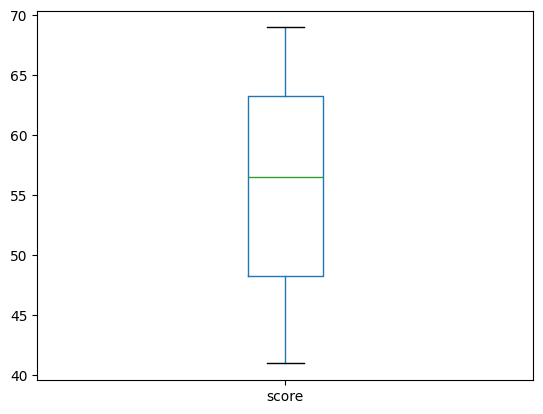

In [41]:
summary_df.boxplot(column=['score'], grid=False)
plt.show()

**데이터프레임의 `describe()` 메서드**

데이터프레임의 `describe()` 메서드는
데이터의 개수, 평균값, 표준편차, 최댓값, 최소값, 사분위수에 대한 정보를 담고있는 데이터프레임을 생성한다.

In [42]:
scores_df = summary_df[['score']]
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


(sec:scaling)=
## 데이터 정규화

데이터 분석을 진행할 때 경우에 따라 데이터셋의 특성값들의 크기
**scale**<font size="2">scale</font>을 비슷하게 조정할 필요가 있다. 이렇게 특성의 스케일을 조정하는 과정을 **스케일링**<font size="2">scaling</font>이라고 부른다.

스케일링은 보통 아래 두 가지 방식을 사용한다.

- min-max 스케일링
- 표준화

**min-max 스케일링**

min-max 스케일링은 아래 식을 이용하여 특성값 $x$를 0에서 1 사이의 값으로 변환한다.
$min$ 와 $max$ 은 해당 특성값들의 최솟값과 최댓값을 가리키고, 이들의 변환값은 각각 0과 1이 된다.

$$
\frac{x-min}{max-min}
$$

min-max 스케일링은 이상치에 민감하다.예를 들어 이상치가 매우 크면 분모가 분자에 비해 훨씬 크게 되어 변환된 값이 0 근처에 몰리게 된다.

아래 코드는 `scores`에 포함된 10개의 점수에 대해 min-max 스케일링을 적용한다.

In [43]:
minmax = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
minmax

array([0.035714, 1.      , 0.535714, 0.      , 0.571429, 0.25    ,
       0.857143, 0.285714, 0.857143, 0.607143])

최솟값 41은 0으로, 최댓값 69는 1로 변환되었음을 알 수 있다.

In [44]:
np.min(minmax), np.max(minmax)

(0.000000, 1.000000)

**표준화**

표준화<font size='2'>standardization</font>는 아래식을 이용하여 특성값 $x$를 변환한다.
$\bar x$ 와 $S$ 는 각각 해당 특성값들의 평균값과 표준편차를 가리킨다.

$$
\frac{x-\bar x}{S}
$$

표준화된 특성값은 평균값은 0, 표준편차는 1인 분포를 따르며, 편차를 표준편차로 나눈 값이므로 min-max 스케일링에 비해 이상치의 영향을 덜 받는다.

In [45]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.401826,  1.509659,  0.107833, -1.509659,  0.215666, -0.754829,
        1.078328, -0.646997,  1.078328,  0.323498])

평균값은 (거의) 0, 표준편차는 (거의) 1이 되었다. `-1.6653345369377347e-17`은 `-1.665334536937734 * (10의 -17승)을 의미하며, 매우 큰, 또는 0에 매우 가까운 숫자를 위한 과학적 표기법이다.

In [46]:
np.mean(z), np.std(z)

(-0.000000, 1.000000)

:::{admonition} 부동소수점 연산
:class: note



위 결과에서 평균값이 정확하게 0이 아니라 0에 매우 가까운 유리수로 나타나는 이유는 컴퓨터가 사용하는 수는 항상 부동소수점<font size='2'>floating point</font>으로 표현된 유리수(무리수는 그것의 유리수 근사값으로 표현)이고 모든 연산은 부동소수점 연산이기 때문이다. 컴퓨터에 숫자를 저장하고 연산하는데는 유한한 메모리를 사용할 수 밖에 없기 때문에 어떤 연산의 결과값은 이론적 계산값과 약간의 오차를 발생시킨다. 예를 들어, 8개의 비트에 저장할 수 있는 가장 큰 양의 정수에 2를 곱한 결과는 8개의 비트에 저장할 수 없음이 논리적으로 분명하다. 부동소수점 연산의 오차 크기는 컴퓨터 사용환경에 따라 달라진다.
:::

아래 코드는 2가지 스케일링(min-max 스케일링과 표준화)을 통해 변환한 값들을 데이터프레임 `scores_df`에 새로운 특성들로 추가하는 과정이다.

In [47]:
scores_df.loc[:, 'score_minmax'] = minmax

In [48]:
scores_df.loc[:, 'score_standardized'] = z

In [49]:
scores_df

,score,score_minmax,score_standardized
student,,,
A,42,0.035714,-1.401826
B,69,1.000000,1.509659
C,56,0.535714,0.107833
D,41,0.000000,-1.509659
E,57,0.571429,0.215666
F,48,0.250000,-0.754829
G,65,0.857143,1.078328
H,49,0.285714,-0.646997
I,65,0.857143,1.078328


앞에서 살펴보았듯이, 데이터프레임의 `describe()` 메서드를 활용하면 각 특성값들의 분포를 한 눈에 살펴볼 수 있다.

In [50]:
scores_df.describe()

,score,score_minmax,score_standardized
count,10.000000,10.000000,1.000000e+01
mean,55.000000,0.500000,-1.665335e-17
std,9.775252,0.349116,1.054093e+00
min,41.000000,0.000000,-1.509659e+00
25%,48.250000,0.258929,-7.278712e-01
50%,56.500000,0.553571,1.617492e-01
75%,63.250000,0.794643,8.896204e-01
max,69.000000,1.000000,1.509659e+00


## 연습문제

참고: [(연습) 1차원 데이터](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-oneD_data.ipynb)